In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=10)

In [3]:
digits['data'][0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [4]:
digits['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
digits['images'][1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [6]:
digits['target'][0:9]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [7]:
digits['target'][0] 

0

In [8]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

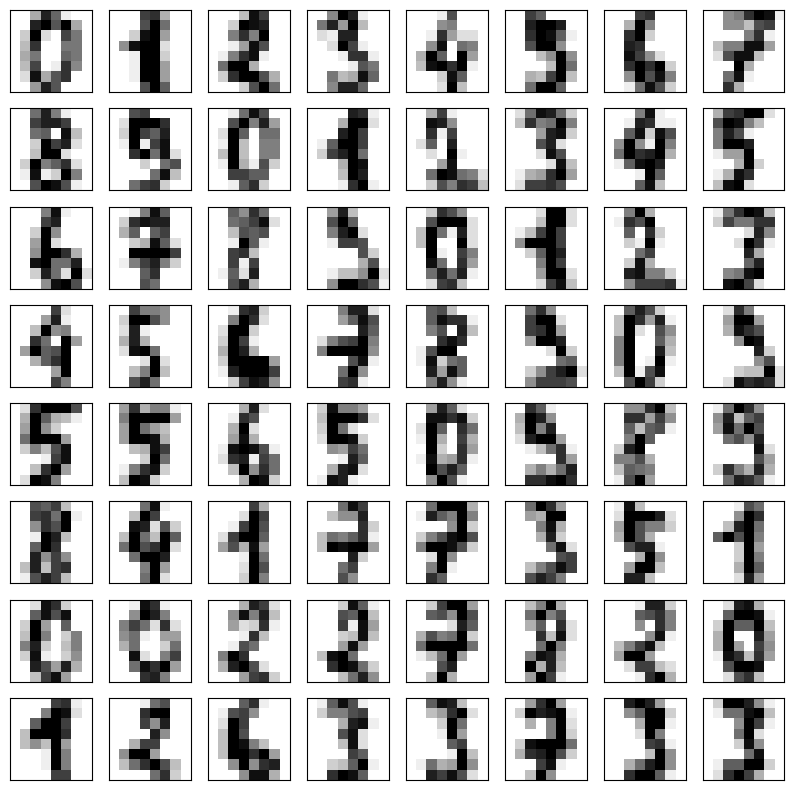

In [9]:
# Each Digit is represented in digits.images as a matrix of 8x8 = 64 pixels. Each of the 64 values represent
# a greyscale. The Greyscale are then plotted in the right scale by the imshow method.
fig, ax = plt.subplots(8,8, figsize=(10,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


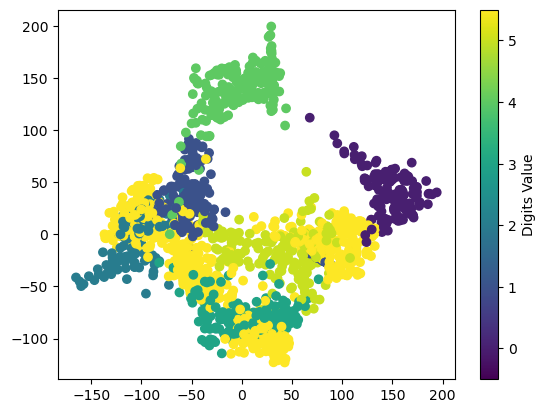

In [10]:
# Plotting - Clustering the data points after using Manifold Learning
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data) # digits.data - 64 dimensions to 2 dimensions
plt.scatter(projection[:, 0], projection[:, 1], c=digits.target, cmap="viridis")
plt.colorbar(ticks=range(10), label='Digits Value')
plt.clim(-0.5, 5.5)

In [11]:
print(projection[:, 0][70], projection[:, 1][70])

-57.045840008901536 62.02422161582343


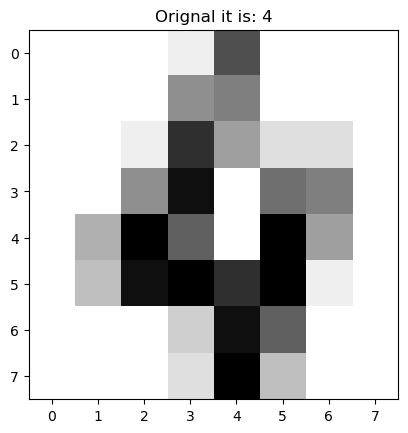

In [12]:
def view_digit(index):
    plt.imshow(digits.images[index] , cmap = plt.cm.gray_r)
    plt.title('Orignal it is: '+ str(digits.target[index]))
    plt.show()
view_digit(4)

In [13]:
main_data = digits['data']
targets = digits['target']

In [14]:
from sklearn import svm
svc = svm.SVC(gamma=0.001 , C = 100)
# GAMMA is a parameter for non linear hyperplanes.
# The higher the gamma value it tries to exactly fit the training data set
# C is the penalty parameter of the error term.
# It controls the trade off between smooth decision boundary and classifying the training points correctly.
svc.fit(main_data[:1500] , targets[:1500])
predictions = svc.predict(main_data[1501:])
# list(zip(predictions , targets[1501:]))

<Axes: >

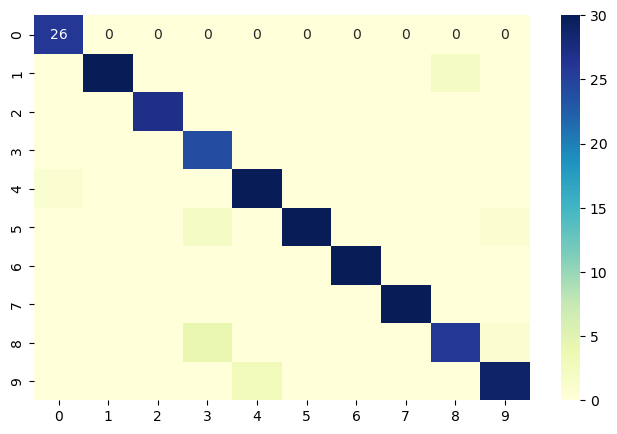

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(predictions, targets[1501:])
conf_matrix = pd.DataFrame(data = cm)
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [16]:
cm

array([[26,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 27,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 24,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0, 30,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0,  0, 26,  1],
       [ 0,  0,  0,  0,  3,  0,  0,  0,  0, 29]], dtype=int64)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(predictions, targets[1501:]))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.94      0.97        32
           2       1.00      1.00      1.00        27
           3       0.80      1.00      0.89        24
           4       0.91      0.97      0.94        31
           5       1.00      0.91      0.95        33
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       0.93      0.84      0.88        31
           9       0.94      0.91      0.92        32

    accuracy                           0.95       296
   macro avg       0.95      0.96      0.95       296
weighted avg       0.96      0.95      0.95       296

